In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import requests
import io
from sklearn.decomposition import PCA

In [2]:
#import BRCA dataset from Kaggle
url = 'https://raw.githubusercontent.com/chanananins/BRCA-PCA/main/brca_data_w_subtypes.csv' 
    
# Make sure the url is the raw version of the file on GitHub 
download = requests.get(url).content
brca_data =  pd.read_csv(io.StringIO(download.decode('utf-8')))

#import from my desktop (can # out and use ^)
#brca_data = pd.read_csv('/Users/chloeyachanin/Desktop/brca_data_w_subtypes.csv')

#clean up dataset for PCA
#identifying where string values present in dataset
string_columns = brca_data.select_dtypes(include=['object']).columns.tolist()
print(string_columns)
#print(dataset[['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']])

brca_data = brca_data.fillna(0)
#changing values in string dataset to numeric values
value_map = {'Positive': 1, 'Negative': 2, 'infiltrating ductal carcinoma': 3, 'infiltrating lobular carcinoma': 4, 'Performed but Not Available':0, 'Not Performed':0, 'Equivocal': 5, 'Indeterminate':6, 'Not Available':0, None: 0}

check_columns = ['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']  # list of string column names

string_value = 'Negative'

for index, row in brca_data.iterrows():
    for string_column in check_columns:
        if row[string_column] in value_map:
            brca_data.at[index, string_column] = value_map[row[string_column]]
       
#print(brca_data[['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']]) 

#save new dataset
#dataset.to_csv('/Users/chloeyachanin/Desktop/modified_brca_data_w_subtypes.csv', index=False)


['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']


In [3]:
#import modified dataset
url = 'https://raw.githubusercontent.com/chanananins/BRCA-PCA/main/modified_brca_data_w_subtypes.csv' 
    
# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

brca_data_modified =  pd.read_csv(io.StringIO(download.decode('utf-8')))

#import from my desktop (can # out and use ^)
#brca_data_modified = pd.read_csv('/Users/chloeyachanin/Desktop/modified_brca_data_w_subtypes.csv')



[0.08144044 0.06107846 0.03168938 0.02893171 0.02393236 0.02022062
 0.01958439 0.01877825 0.01773981 0.01666044 0.016176   0.01580464
 0.01432871 0.01364557 0.01222762 0.0117395  0.01144049 0.01098194
 0.01035046 0.01000633 0.00945832 0.0087054  0.00844711 0.00812972
 0.00796548 0.00774307 0.00723168 0.00707057 0.00697544 0.00672409
 0.00662998 0.00642343 0.00594083 0.00580139 0.00564451 0.00547344
 0.00517329 0.00505133 0.00488573 0.00465757 0.00451347 0.00438254
 0.00418587 0.00410264 0.00406967 0.00396702 0.00392922 0.00379614
 0.00371455 0.00358654 0.00352056 0.00350968 0.00343256 0.00342582
 0.00332727 0.00331422 0.00325559 0.00313015 0.0031104  0.00301049
 0.00298201 0.00292374 0.00288796 0.00285105 0.0027171  0.00269771
 0.00268044 0.00264849 0.00258949 0.00255796 0.00253672 0.00247804
 0.00247165 0.00245184 0.00240114 0.0023615  0.00235003 0.00232403
 0.00230137 0.00227387 0.00223417 0.00221193 0.00218041 0.0021368
 0.00209998 0.00208267 0.00207217 0.00204227 0.00203528 0.00201

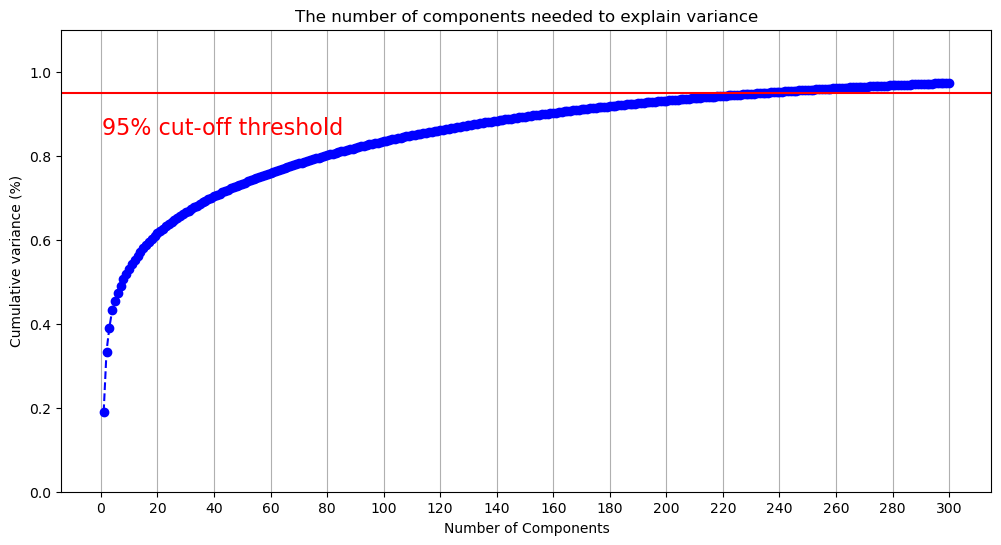

In [4]:
#perform PCA on data

#distribute data into two components X and Y
X = brca_data_modified.iloc[:, 0:1940].values
y = brca_data_modified.iloc[:, 1940].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#normalize data
sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
  
pca = PCA(n_components = 0.95)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

print(explained_variance)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

pca = PCA().fit(brca_data_modified.iloc[:, 0:604])


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1,301)
y = np.cumsum(pca.explained_variance_ratio_)[:300]

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 301, step=20)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [5]:

cancer_type = brca_data_modified.iloc[:, 1940]
vital_status = brca_data_modified.iloc[:, 1936]
PR_status = brca_data_modified.iloc[:, 1937]
ER_status = brca_data_modified.iloc[:, 1938]
HER2_status = brca_data_modified.iloc[:, 1939]

# Perform PCA on gene expression (rs)
pca_rs = PCA(n_components=0.95)
rs_pca = pca_rs.fit_transform(brca_data_modified.iloc[:, 0:604])

# Perform PCA on copy number variation (cn)
pca_cn = PCA(n_components=0.95)
cn_pca = pca_cn.fit_transform(brca_data_modified.iloc[:, 604:1464])

# Perform PCA on mutations (mu)
pca_mu = PCA(n_components=0.95)
mu_pca = pca_mu.fit_transform(brca_data_modified.iloc[:, 1464:1713])

# Perform PCA on protein levels (pp)
pca_pp = PCA(n_components=0.95)
pp_pca = pca_pp.fit_transform(brca_data_modified.iloc[:, 1713:1936])

In [21]:
#combine PCA results into one dataset
combined_pca_data = pd.DataFrame(data = {'cn_pc1': cn_pca[:,0], 'cn_pc2': cn_pca[:,1],
                                'mu_pc1': mu_pca[:,0], 'mu_pc2': mu_pca[:,1],
                                'rs_pc1': rs_pca[:,0], 'rs_pc2': rs_pca[:,1],
                                'pp_pc1': pp_pca[:,0], 'pp_pc2': pp_pca[:,1], 
                                'vital_status': vital_status, 
                                'PR_status': PR_status,
                                'ER_status': ER_status,
                                'HER2_status': HER2_status,
                                'cancer_type': cancer_type})
import matplotlib.pyplot as plt
print(pca_cn.shape)

AttributeError: 'PCA' object has no attribute 'shape'

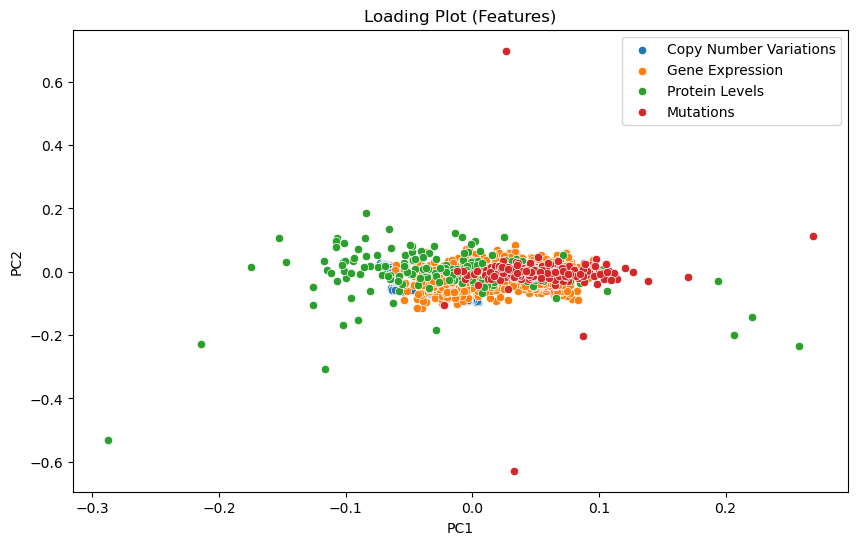

In [7]:
# Create the loading plot
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_cn.components_[0], y=pca_cn.components_[1], label='Copy Number Variations')
sns.scatterplot(x=pca_rs.components_[0], y=pca_rs.components_[1], label='Gene Expression')
sns.scatterplot(x=pca_pp.components_[0], y=pca_pp.components_[1], label='Protein Levels')
sns.scatterplot(x=pca_mu.components_[0], y=pca_mu.components_[1], label='Mutations')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Loading Plot (Features)')
plt.show()

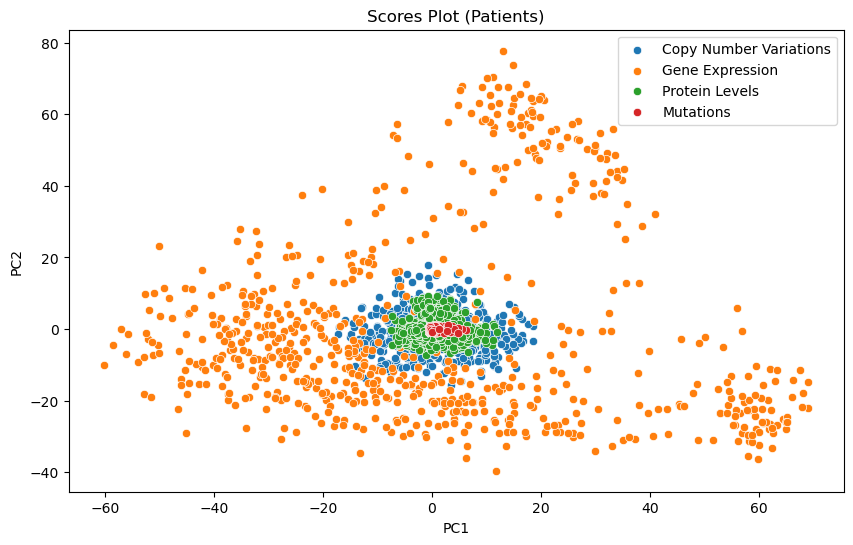

In [8]:
# Create the scores plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_pca_data['cn_pc1'], y=combined_pca_data['cn_pc2'], label='Copy Number Variations')
sns.scatterplot(x=combined_pca_data['rs_pc1'], y=combined_pca_data['rs_pc2'], label='Gene Expression')
sns.scatterplot(x=combined_pca_data['pp_pc1'], y=combined_pca_data['pp_pc2'], label='Protein Levels')
sns.scatterplot(x=combined_pca_data['mu_pc1'], y=combined_pca_data['mu_pc2'], label='Mutations')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (Patients)')
plt.show()

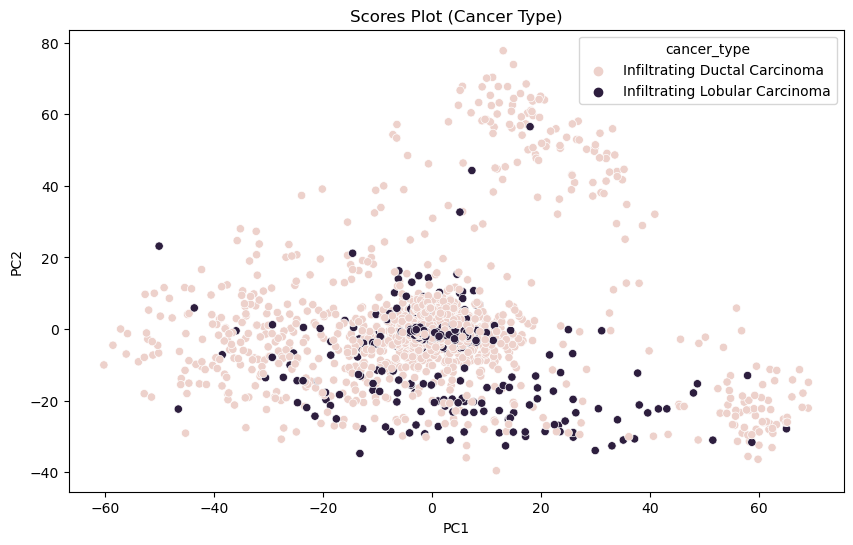

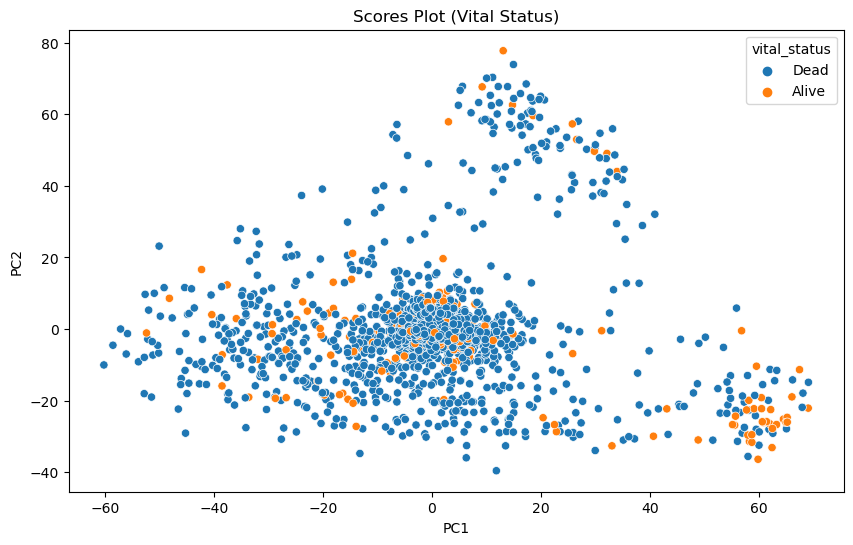

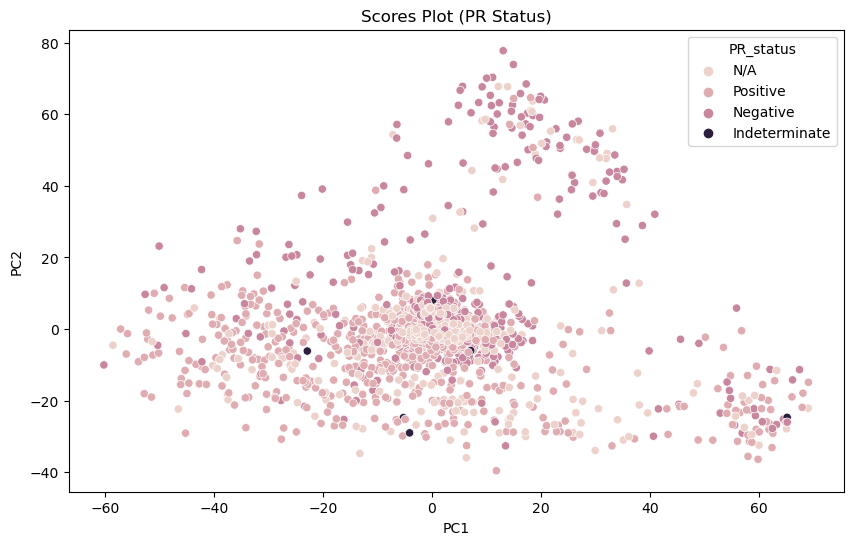

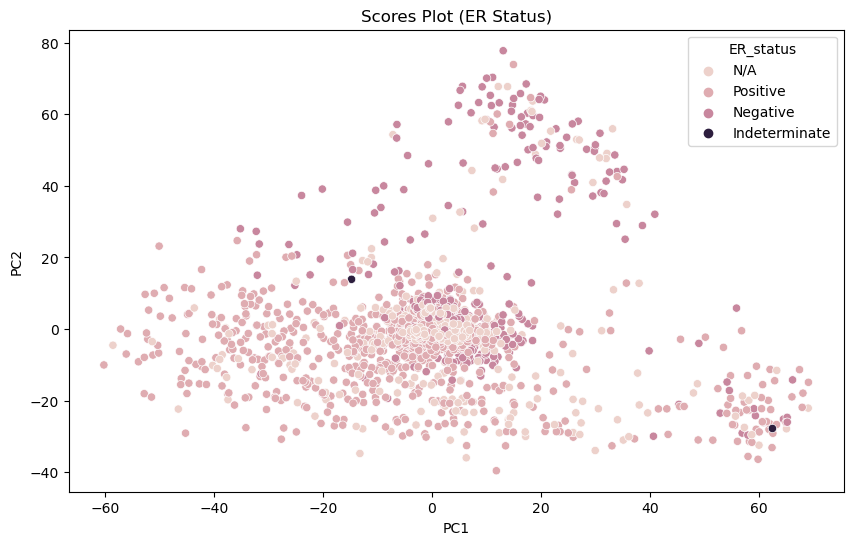

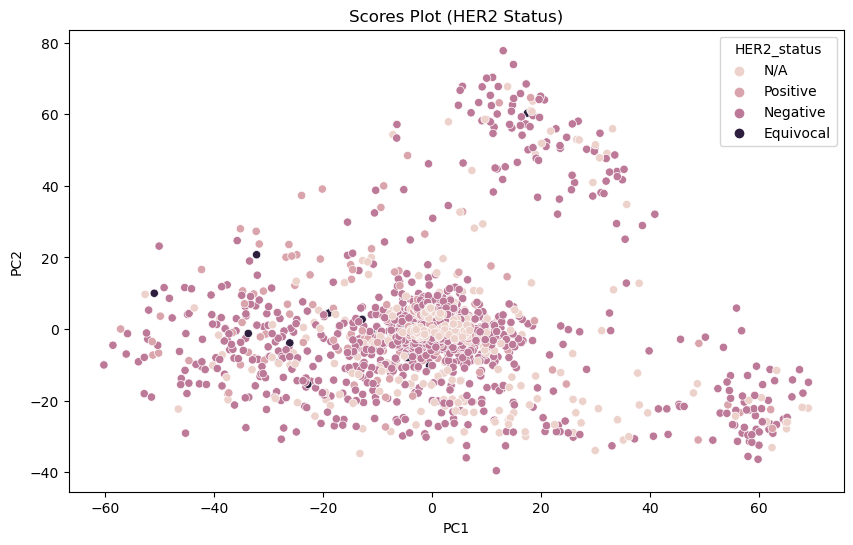

In [9]:
#Cancer Type Scores Plot
plt.figure(figsize=(10, 6))
change_label = sns.scatterplot(x=combined_pca_data['cn_pc1'], y=combined_pca_data['cn_pc2'], hue=combined_pca_data['cancer_type'])
labels = change_label.get_legend().get_texts()
labels[0].set_text('Infiltrating Ductal Carcinoma')
labels[1].set_text('Infiltrating Lobular Carcinoma')


sns.scatterplot(x=combined_pca_data['mu_pc1'], y=combined_pca_data['mu_pc2'], hue=combined_pca_data['cancer_type'], legend=False)
sns.scatterplot(x=combined_pca_data['rs_pc1'], y=combined_pca_data['rs_pc2'], hue=combined_pca_data['cancer_type'], legend=False)
sns.scatterplot(x=combined_pca_data['pp_pc1'], y=combined_pca_data['pp_pc2'], hue=combined_pca_data['cancer_type'], legend=False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (Cancer Type)')
plt.show()

#Vital Status Scores Plot
plt.figure(figsize=(10, 6))
change_label = sns.scatterplot(x=combined_pca_data['cn_pc1'], y=combined_pca_data['cn_pc2'], hue=combined_pca_data['vital_status'])
labels = change_label.get_legend().get_texts()
labels[0].set_text('Dead')
labels[1].set_text('Alive')


sns.scatterplot(x=combined_pca_data['mu_pc1'], y=combined_pca_data['mu_pc2'], hue=combined_pca_data['vital_status'], legend=False)
sns.scatterplot(x=combined_pca_data['rs_pc1'], y=combined_pca_data['rs_pc2'], hue=combined_pca_data['vital_status'], legend=False)
sns.scatterplot(x=combined_pca_data['pp_pc1'], y=combined_pca_data['pp_pc2'], hue=combined_pca_data['vital_status'], legend=False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (Vital Status)')
plt.show()

#PR Status Scores Plot
plt.figure(figsize=(10, 6))
change_label = sns.scatterplot(x=combined_pca_data['cn_pc1'], y=combined_pca_data['cn_pc2'], hue=combined_pca_data['PR_status'])
labels = change_label.get_legend().get_texts()
labels[0].set_text('N/A')
labels[1].set_text('Positive')
labels[2].set_text('Negative')
labels[3].set_text('Indeterminate')


sns.scatterplot(x=combined_pca_data['mu_pc1'], y=combined_pca_data['mu_pc2'], hue=combined_pca_data['PR_status'], legend=False)
sns.scatterplot(x=combined_pca_data['rs_pc1'], y=combined_pca_data['rs_pc2'], hue=combined_pca_data['PR_status'], legend=False)
sns.scatterplot(x=combined_pca_data['pp_pc1'], y=combined_pca_data['pp_pc2'], hue=combined_pca_data['PR_status'], legend=False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (PR Status)')
plt.show()

#ER Status Scores Plot
plt.figure(figsize=(10, 6))
change_label = sns.scatterplot(x=combined_pca_data['cn_pc1'], y=combined_pca_data['cn_pc2'], hue=combined_pca_data['ER_status'])
labels = change_label.get_legend().get_texts()
labels[0].set_text('N/A')
labels[1].set_text('Positive')
labels[2].set_text('Negative')
labels[3].set_text('Indeterminate')


sns.scatterplot(x=combined_pca_data['mu_pc1'], y=combined_pca_data['mu_pc2'], hue=combined_pca_data['ER_status'], legend=False)
sns.scatterplot(x=combined_pca_data['rs_pc1'], y=combined_pca_data['rs_pc2'], hue=combined_pca_data['ER_status'], legend=False)
sns.scatterplot(x=combined_pca_data['pp_pc1'], y=combined_pca_data['pp_pc2'], hue=combined_pca_data['ER_status'], legend=False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (ER Status)')
plt.show()

#HER2 Status Scores Plot
plt.figure(figsize=(10, 6))
change_label = sns.scatterplot(x=combined_pca_data['cn_pc1'], y=combined_pca_data['cn_pc2'], hue=combined_pca_data['HER2_status'])
labels = change_label.get_legend().get_texts()
labels[0].set_text('N/A')
labels[1].set_text('Positive')
labels[2].set_text('Negative')
labels[3].set_text('Equivocal')


sns.scatterplot(x=combined_pca_data['mu_pc1'], y=combined_pca_data['mu_pc2'], hue=combined_pca_data['HER2_status'], legend=False)
sns.scatterplot(x=combined_pca_data['rs_pc1'], y=combined_pca_data['rs_pc2'], hue=combined_pca_data['HER2_status'], legend=False)
sns.scatterplot(x=combined_pca_data['pp_pc1'], y=combined_pca_data['pp_pc2'], hue=combined_pca_data['HER2_status'], legend=False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (HER2 Status)')
plt.show()

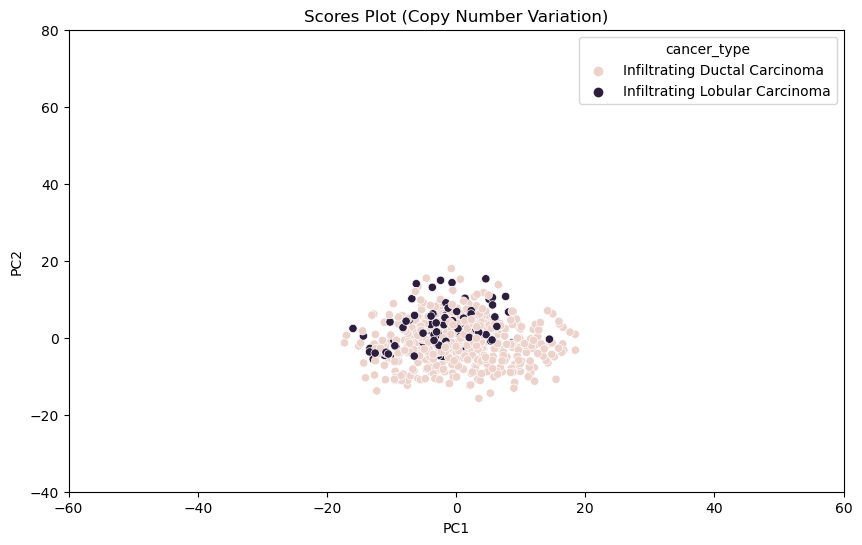

In [10]:
#separate plots
plt.figure(figsize=(10, 6))
change_label = sns.scatterplot(x=combined_pca_data['cn_pc1'], y=combined_pca_data['cn_pc2'], hue=combined_pca_data['cancer_type'])
labels = change_label.get_legend().get_texts()
labels[0].set_text('Infiltrating Ductal Carcinoma')
labels[1].set_text('Infiltrating Lobular Carcinoma')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (Copy Number Variation)')
plt.xlim(-60, 60)
plt.ylim(-40, 80)
plt.show()

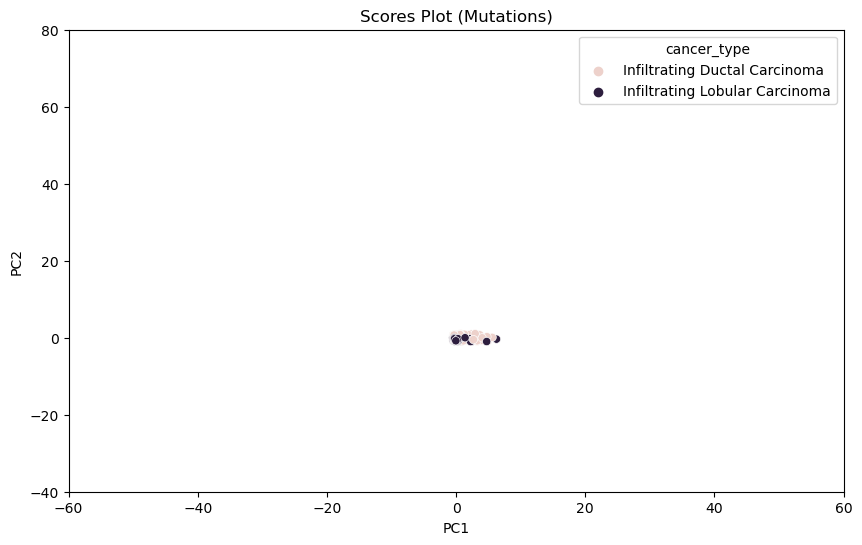

In [11]:
plt.figure(figsize=(10, 6))
change_label = sns.scatterplot(x=combined_pca_data['mu_pc1'], y=combined_pca_data['mu_pc2'], hue=combined_pca_data['cancer_type'])
labels = change_label.get_legend().get_texts()
labels[0].set_text('Infiltrating Ductal Carcinoma')
labels[1].set_text('Infiltrating Lobular Carcinoma')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (Mutations)')
plt.xlim(-60, 60)
plt.ylim(-40, 80)
plt.show()

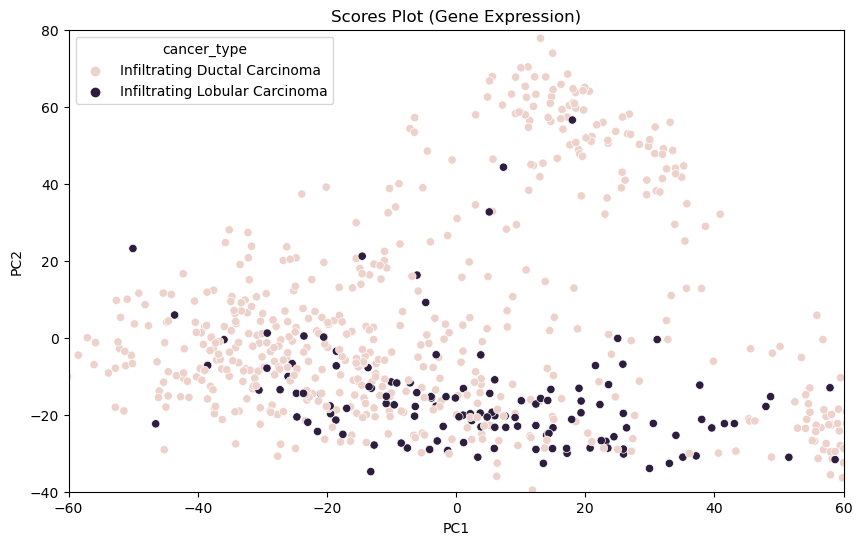

In [12]:
plt.figure(figsize=(10, 6))
change_label = sns.scatterplot(x=combined_pca_data['rs_pc1'], y=combined_pca_data['rs_pc2'], hue=combined_pca_data['cancer_type'])
labels = change_label.get_legend().get_texts()
labels[0].set_text('Infiltrating Ductal Carcinoma')
labels[1].set_text('Infiltrating Lobular Carcinoma')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (Gene Expression)')
plt.xlim(-60, 60)
plt.ylim(-40, 80)
plt.show()

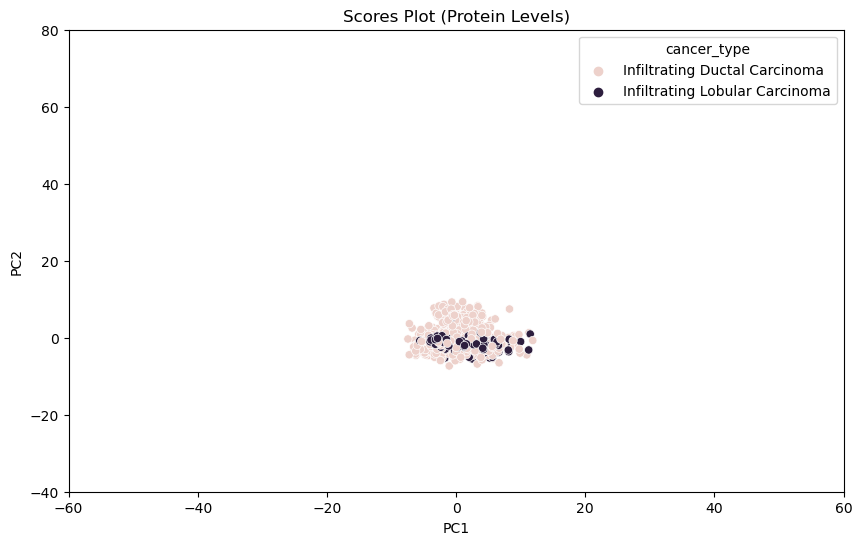

In [13]:
plt.figure(figsize=(10, 6))
change_label = sns.scatterplot(x=combined_pca_data['pp_pc1'], y=combined_pca_data['pp_pc2'], hue=combined_pca_data['cancer_type'])
labels = change_label.get_legend().get_texts()
labels[0].set_text('Infiltrating Ductal Carcinoma')
labels[1].set_text('Infiltrating Lobular Carcinoma')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (Protein Levels)')
plt.xlim(-60, 60)
plt.ylim(-40, 80)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(brca_data_modified)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data_standardized)

loadings = pca.components_.T
scores = pca.transform(data_standardized)


print("Shape of loadings matrix:", loadings.shape)
print("Shape of scores matrix:", scores.shape)

Shape of loadings matrix: (1941, 705)
Shape of scores matrix: (705, 705)


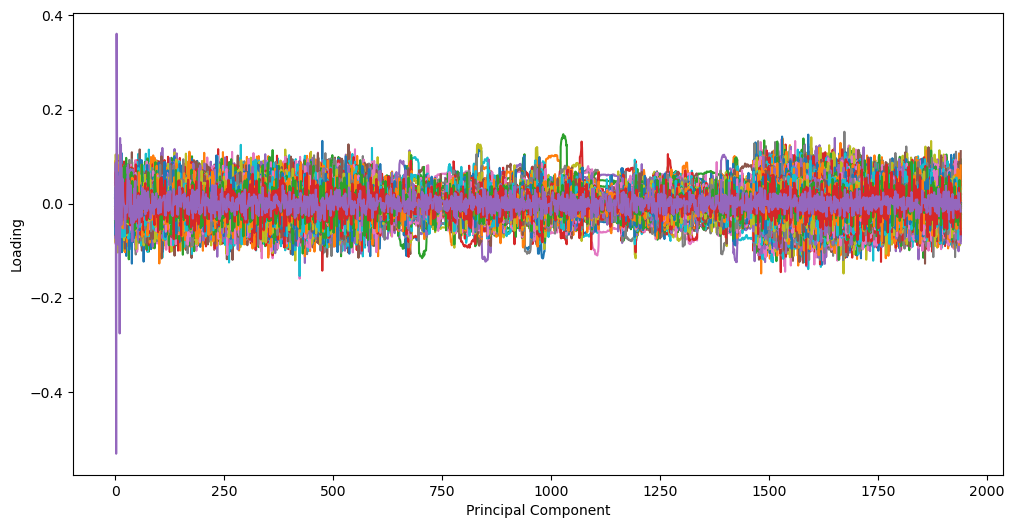

In [15]:
x_label = 'Principal Component'
y_label = 'Loading'

fig, ax = plt.subplots()
ax.plot(loadings)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
plt.show()

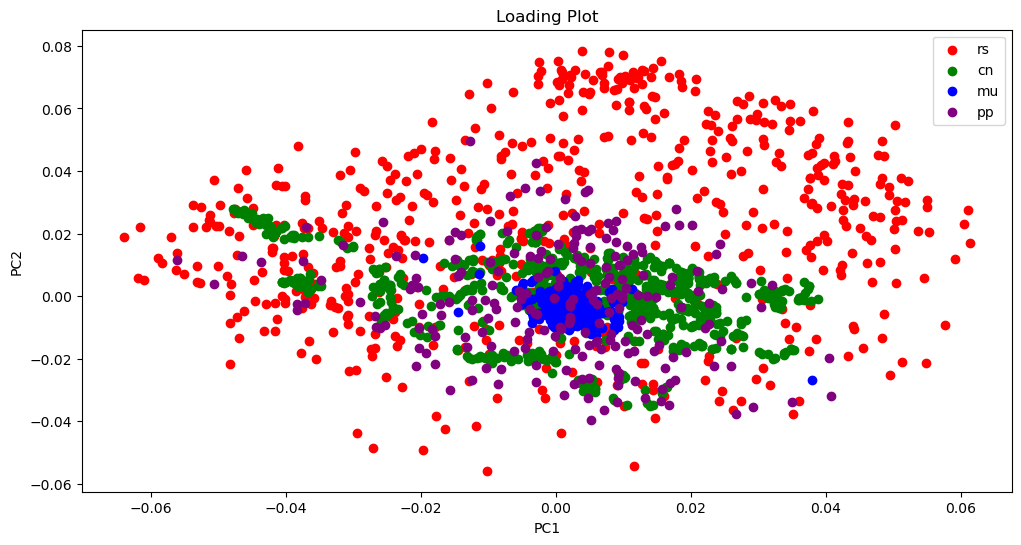

In [16]:
x_label = 'PC1'
y_label = 'PC2'
data_type_colors = {'rs': 'red', 'cn': 'green', 'mu': 'blue', 'pp': 'purple'}

fig, ax = plt.subplots()

data_types = [col[:2] for col in brca_data_modified.columns]

for data_type, color in data_type_colors.items():
    mask = [data_type == dt for dt in data_types]
    ax.scatter(loadings[mask, 0], loadings[mask, 1], c=color, label=data_type)

# Add variable labels to the scatter plot
#for i, variable in enumerate(brca_data_modified.columns):
    #ax.annotate(variable, (loadings[i, 0], loadings[i, 1]))


ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title('Loading Plot')

plt.legend()
plt.show()

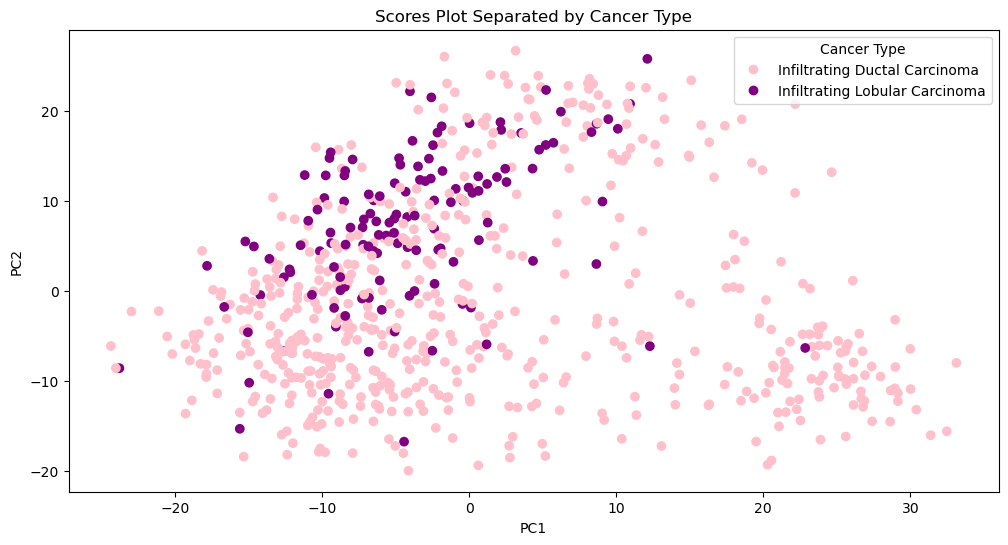

In [51]:
import matplotlib.colors as mcolors
x_label = 'PC1'
y_label = 'PC2'

colors = mcolors.ListedColormap(['pink', 'green', 'blue', 'purple'])

change_label = {3: 'Infiltrating Ductal Carcinoma', 4: 'Infiltrating Lobular Carcinoma'}
fig, ax = plt.subplots()
scatter = ax.scatter(scores[:, 0], scores[:, 1], c=brca_data_modified.iloc[:, 1940], cmap = colors)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title('Scores Plot Separated by Cancer Type')
legend_labels = [change_label[label] for label in brca_data_modified.iloc[:, 1940].unique()]
legend = ax.legend(handles=scatter.legend_elements()[0], title='Cancer Type', labels = legend_labels)


plt.show()


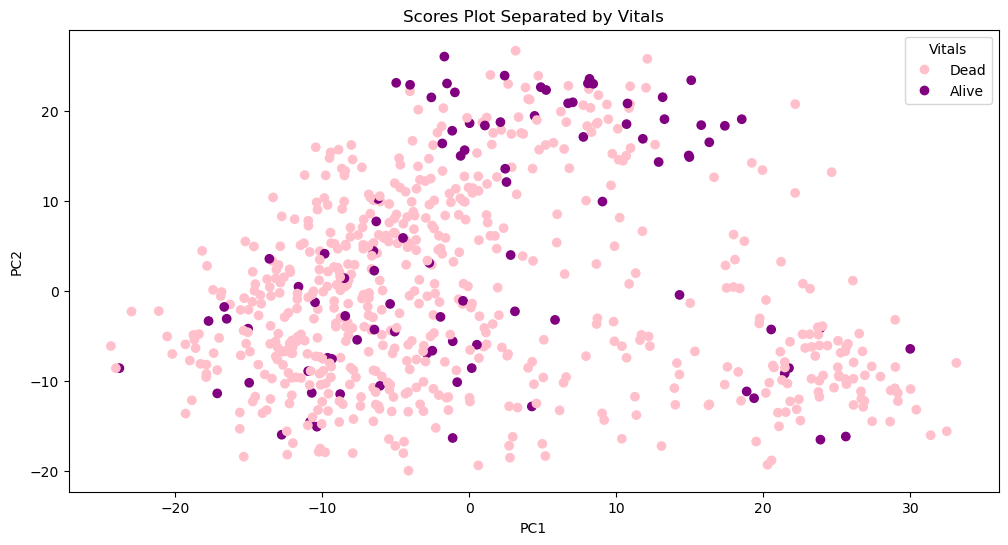

In [52]:
x_label = 'PC1'
y_label = 'PC2'


change_label = {1: 'Alive', 0: 'Dead'}
fig, ax = plt.subplots()
scatter = ax.scatter(scores[:, 0], scores[:, 1], c=brca_data_modified.iloc[:, 1936], cmap = colors)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title('Scores Plot Separated by Vitals')
legend_labels = [change_label[label] for label in brca_data_modified.iloc[:, 1936].unique()]
legend = ax.legend(handles=scatter.legend_elements()[0], title='Vitals', labels = legend_labels)


plt.show()

[1 3 0 6]


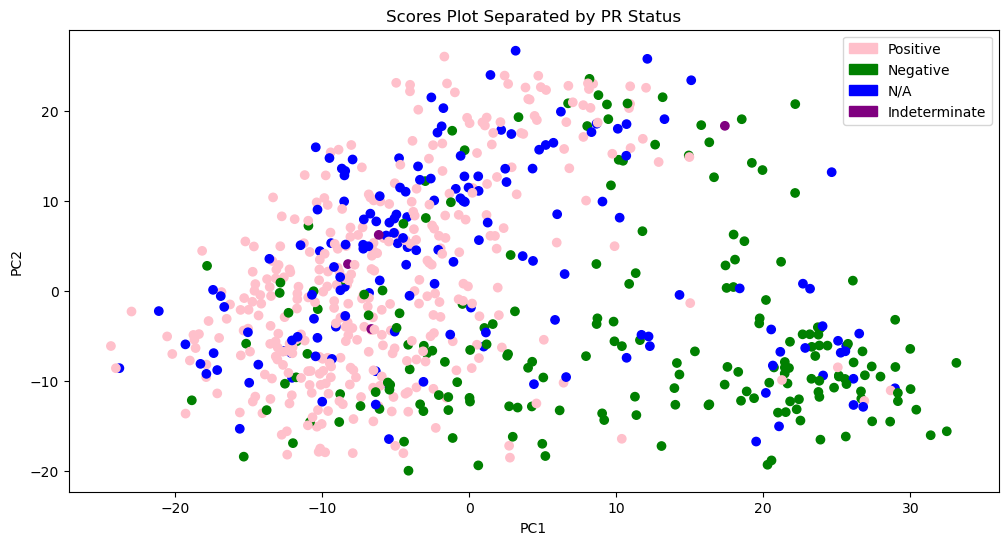

In [78]:
import matplotlib.patches as mpatches

x_label = 'PC1'
y_label = 'PC2'

change_color = {1: 'pink', 3: 'green', 0: 'blue', 6: 'purple'}
change_label = {1: 'Positive', 3: 'Negative', 0: 'N/A', 6: 'Indeterminate'}
color_list = [change_color[val] for val in brca_data_modified.iloc[:, 1937]]

print(brca_data_modified.iloc[:, 1937].unique())

fig, ax = plt.subplots()
scatter = ax.scatter(scores[:, 0], scores[:, 1],  c=color_list)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title('Scores Plot Separated by PR Status')
#legend_labels = [change_label[label] for label in brca_data_modified.iloc[:, 1937].unique()]
#legend = ax.legend(handles=scatter.legend_elements()[0], title='PR Status', labels = legend_labels)

#print(brca_data_modified.iloc[:, 1937])

handles = []
for key in change_label:
    label = change_label[key]
    color = change_color[key]
    handles.append(mpatches.Patch(color=color, label=label))
    
ax.legend(handles=handles)

plt.show()

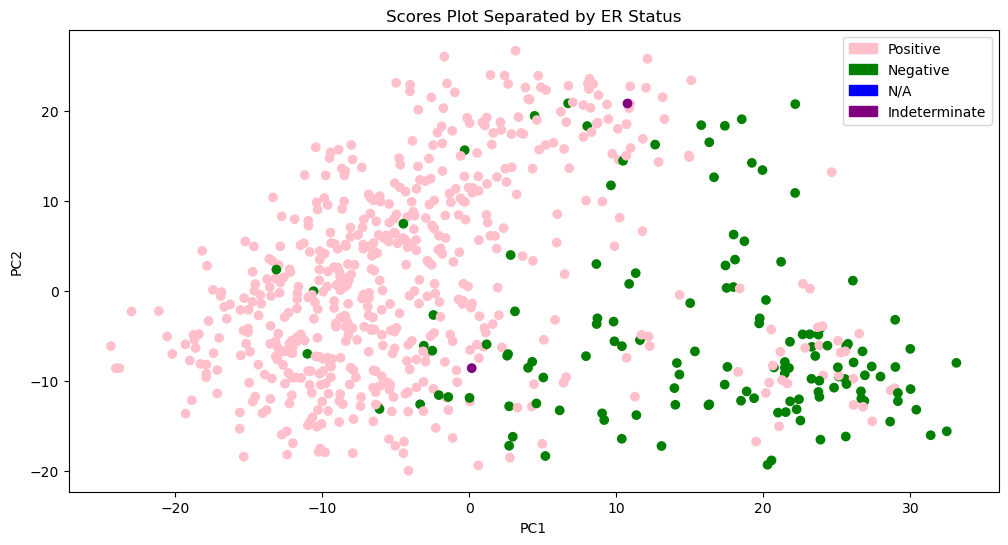

In [83]:
x_label = 'PC1'
y_label = 'PC2'
change_color = {1: 'pink', 2: 'green', 0: 'blue', 6: 'purple'}
change_label = {1: 'Positive', 2: 'Negative', 0: 'N/A', 6: 'Indeterminate'}
color_list = [change_color[val] for val in brca_data_modified.iloc[:, 1938]]
fig, ax = plt.subplots()
scatter = ax.scatter(scores[:, 0], scores[:, 1], c=brca_data_modified.iloc[:, 1938], cmap = colors)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title('Scores Plot Separated by ER Status')
#legend_labels = [change_label[label] for label in brca_data_modified.iloc[:, 1938].unique()]
#legend = ax.legend(handles=scatter.legend_elements()[0], title='Er Status', labels = legend_labels)

handles = []
for key in change_label:
    label = change_label[key]
    color = change_color[key]
    handles.append(mpatches.Patch(color=color, label=label))
    
ax.legend(handles=handles)


plt.show()

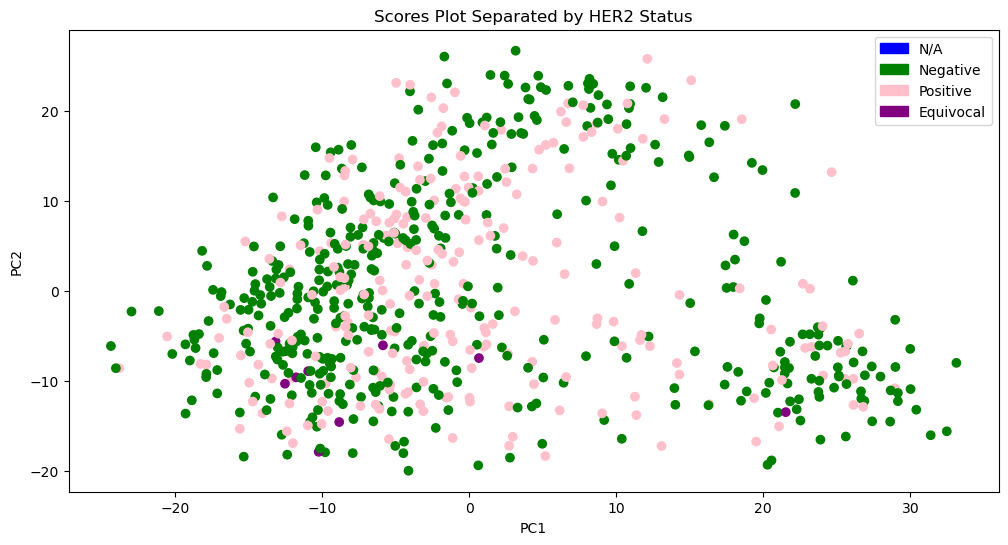

In [86]:
x_label = 'PC1'
y_label = 'PC2'
change_color = {1: 'pink', 2: 'green', 0: 'blue', 5: 'purple'}
change_label = {0: 'N/A', 2: 'Negative', 1: 'Positive', 5: 'Equivocal'}
color_list = [change_color[val] for val in brca_data_modified.iloc[:, 1939]]
fig, ax = plt.subplots()
scatter = ax.scatter(scores[:, 0], scores[:, 1], c=brca_data_modified.iloc[:, 1939], cmap = colors)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title('Scores Plot Separated by HER2 Status')
legend_labels = [change_label[label] for label in brca_data_modified.iloc[:, 1939].unique()]
legend = ax.legend(handles=scatter.legend_elements()[0], title='HER2 Status', labels = legend_labels)

handles = []
for key in change_label:
    label = change_label[key]
    color = change_color[key]
    handles.append(mpatches.Patch(color=color, label=label))
    
ax.legend(handles=handles)

plt.show()